In [ ]:
## ASSET BACKED SECURITIES - AUTO FINANCE LOAN DEFAULT PREDICTION

### What is an Asset-Backed Security
An asset-backed security (ABS) is a financial security collateralized by a pool of assets such as loans, leases, credit card debt, royalties or receivables. For investors, asset-backed securities are an alternative to investing in corporate debt. An ABS is similar to a mortgage-backed security, except that the underlying securities are not mortgage-based.

Asset-backed securities allow issuers to generate more cash, which, in turn, is used for more lending while giving investors the opportunity to invest in a wide variety of income-generating assets. Usually, the underlying assets of an ABS are illiquid and can't be sold on their own. But pooling the assets together and creating a financial security, a process called securitization, enables the owner of the assets to make them marketable. The underlying assets of these pools may be home equity loans, automobile loans, credit card receivables, student loans or other expected cash flows. Issuers of ABS can be as creative as they desire. For example, ABS have been created based on cash flows from movie revenues, royalty payments, aircraft leases and solar photovoltaics. Just about any cash-producing situation can be securitized into an ABS.

### Example of Asset-Backed Security
Assume that Company X is in the business of making automobile loans. If a person wants to borrow money to buy a car, Company X gives that person the cash, and the person is obligated to repay the loan with a certain amount of interest. Perhaps Company X makes so many loans that it runs out of cash to continue making more loans. Company X can then package its current loans and sell them to Investment Firm X, thus receiving cash that it can use to make more loans.

Investment Firm X will then sort the purchased loans into different groups called tranches. These tranches are groups of loans with similar characteristics, such as maturity, interest rate and expected delinquency rate. Next, Investment Firm X will issue securities that are similar to typical bonds on each tranche it creates.

Individual investors then purchase these securities and receive the cash-flows from the underlying pool of auto loans, minus an administrative fee that Investment Firm X keeps for itself.

### Typical Tranches
Usually an ABS will have three tranches: class A, B and C. The senior tranche, A, is almost always the largest tranche and is structured to have an investment-grade rating to make it attractive to investors.

The B tranche has lower credit quality and thus has a higher yield than the senior tranche. The C tranche has a lower credit rating than the B tranche and might have such poor credit quality that it can't be sold to investors. In this case, the issuer would keep the C tranche and absorb the losses.


### Vanguard Use Case 
To predict loan default based on public data from SEC and additional economic data

![Auto Loans](datasets/saupload_US-auto-loans-2017-Q1.png)

### Import Libraries

In [1]:
import re
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Input, Dense, Dropout, LSTM, GRU
# from keras.models import Model, load_model
# from keras.callbacks import ModelCheckpoint, TensorBoard
# from keras import regularizers
# tf.__version__
%matplotlib inline

import seaborn as sns
# import itertools
# import operator
# import collections
# from scipy.io import mmread, mmwrite
# from random import randint
# from sklearn import linear_model
# from sklearn.grid_search import GridSearchCV
# from sklearn import preprocessing as pp
# from sklearn.svm import SVR
# from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.decomposition import PCA, KernelPCA
# from sklearn.decomposition import NMF
# from sklearn.pipeline import Pipeline
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
# import scipy.stats as stats
# from sklearn import tree
# from sklearn.feature_selection import f_regression
# from sklearn.gaussian_process import GaussianProcess
# from sklearn.metrics import roc_auc_score
# from sklearn import metrics

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, precision_recall_curve
# from sklearn.metrics import recall_score, classification_report, auc, roc_curve
# from sklearn.metrics import precision_recall_fscore_support, f1_score
# from sklearn.preprocessing import StandardScaler
# import warnings
# warnings.filterwarnings('ignore')

### Model Name

In [2]:
# name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

### Default Parameters

In [3]:
#parameters to choose
default_days = 0
#nrows = 40_000_000
train_split = 0.80
model_type = 'scikit-learn'
path = 'c:/users/ugy1/abs/'
#rows_for_prediction = 1000
cutOffForOriginationDate='2012-01-01'
manualOversamplingFactor=0.0
epochs=1

### Features to Be Used from Data

In [4]:
# columns to be used
use_list=[
    'abs_loan.cik',
 #'abs_loan.accessionnumber',
 #'abs_loan.assettypenumber',
 'abs_loan.assetnumber',
 'abs_loan.reportingperiodbeginningdate',
 'abs_loan.reportingperiodendingdate',
 'abs_loan.originatorname',
 'abs_loan.originationdate',
 'abs_loan.originalloanamount',
 'abs_loan.originalloanterm',
 'abs_loan.loanmaturitydate',
 'abs_loan.originalinterestratepercentage',
 #'interestcalculationtypecode',
 'abs_loan.originalinterestratetypecode',
 'abs_loan.originalinterestonlytermnumber',
 'abs_loan.originalfirstpaymentdate',
 'abs_loan.underwritingindicator',
 'abs_loan.graceperiodnumber',
 #'paymenttypecode',
 'abs_loan.subvented',
 #'vehiclemanufacturername',
 #'vehiclemodelname',
 'abs_loan.vehiclenewusedcode',
 #'vehiclemodelyear',
 'abs_loan.vehicletypecode',
 #'vehiclevalueamount',
 #'vehiclevaluesourcecode',
 'abs_loan.obligorcreditscoretype',
 'abs_loan.obligorcreditscore',
 'abs_loan.obligorincomeverificationlevelcode',
 'abs_loan.obligoremploymentverificationcode',
 'abs_loan.coobligorindicator',
 'abs_loan.paymenttoincomepercentage',
 #'obligorgeographiclocation',
 'abs_loan.assetaddedindicator',
 #'remainingtermtomaturitynumber',
 'abs_loan.reportingperiodmodificationindicator',
 #'abs_loan.servicingadvancemethodcode',
 'abs_loan.reportingperiodbeginningloanbalanceamount',
 'abs_loan.nextreportingperiodpaymentamountdue',
 'abs_loan.reportingperiodinterestratepercentage',
 'abs_loan.nextinterestratepercentage',
 'abs_loan.servicingfeepercentage',
 'abs_loan.servicingflatfeeamount',
 'abs_loan.otherservicerfeeretainedbyservicer',
 ####'abs_loan.otherassesseduncollectedservicerfeeamount',
 'abs_loan.scheduledinterestamount',
 'abs_loan.scheduledprincipalamount',
 'abs_loan.otherprincipaladjustmentamount',
 'abs_loan.reportingperiodactualendbalanceamount',
 'abs_loan.reportingperiodscheduledpaymentamount',
 ####'abs_loan.totalactualamountpaid',
 'abs_loan.actualinterestcollectedamount',
 'abs_loan.actualprincipalcollectedamount',
 'abs_loan.actualothercollectedamount',
 ####'abs_loan.serviceradvancedamount',
 'abs_loan.interestpaidthroughdate',
 'abs_loan.zerobalanceeffectivedate',
 'abs_loan.zerobalancecode',
 'abs_loan.currentdelinquencystatus',
 #'primaryloanservicername',
 #'mostrecentservicingtransferreceiveddate',
 #'assetsubjectdemandindicator',
 #'assetsubjectdemandstatuscode',
 #'repurchaseamount',
 #'demandresolutiondate',
 #'repurchasername',
 #'repurchasereplacementreasoncode',
 #'chargedoffprincipalamount',
 #'recoveredamount',
 #'modificationtypecode',
 #'paymentextendednumber',
 #'repossessedindicator',
 #'repossessedproceedsamount'
]

### GPU Options

In [5]:
#set gpu options to adjust gpu usage
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

### Load data

In [6]:
#load data from tab delimited file
df=pd.read_csv(path+'prod/abs_loan_Dec_to_Sep.csv', 
               usecols=use_list, 
               sep='\t',
               #compression=bz2,
               #nrows=nrows,
               low_memory=False, 
              #index_col='abs_loan.reportingperiodendingdate', 
               parse_dates=True
              )

#remove 'abs_loan.' string from columns because 'dot' is a command in pandas
df.columns=df.columns.str.replace('abs_loan.','')

#display data shape
print(df.shape)
#view first five rows of all columns
#df.head(n=5)

(40789594, 45)


### Analyse and Delete Duplicate Data

In [7]:
#df.duplicated(subset=['cik','assetnumber']).sum()

In [8]:
#df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate','originationdate']).sum()

In [9]:
#df.loc[df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']),:]

In [10]:
#df.duplicated().sum()

In [11]:
df.drop_duplicates(subset=['cik','assetnumber','reportingperiodendingdate','originationdate'],keep='last', inplace=True)

In [12]:
#df.columns.tolist()
df.shape

(39324740, 45)

### Dataframe Memory Usage and Datatypes

In [13]:
#df.info(memory_usage='deep')

In [14]:
df.memory_usage(deep=True).sum()

46451029487

In [15]:
df.dtypes

cik                                            int64
assetnumber                                   object
reportingperiodbeginningdate                  object
reportingperiodendingdate                     object
originatorname                                object
originationdate                               object
originalloanamount                           float64
originalloanterm                             float64
loanmaturitydate                              object
originalinterestratepercentage               float64
originalinterestratetypecode                 float64
originalinterestonlytermnumber               float64
originalfirstpaymentdate                      object
underwritingindicator                         object
graceperiodnumber                            float64
subvented                                     object
vehiclenewusedcode                           float64
vehicletypecode                              float64
obligorcreditscoretype                        

In [16]:
#df.head()
#df=df.sort_values(by='originationdate', ascending=True)

### Function to Draw Bar chart

In [17]:
#function to draw a bar chart 
def draw(data, title, ylabel, sort = False, n=-1):
    labels = pd.value_counts(data).head().index.tolist()
    count_classes = pd.value_counts(data, sort).head()
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print('Top ',n,' counts: ','\n',pd.value_counts(data, sort).head(n))

### Reporting Period
we have taken reportingperiodendingdate as a proxy for the reporting period

Missing values in the reporting period

In [18]:
df.reportingperiodendingdate.isna().mean()

0.0

In [ ]:
df.reportingperiodendingdate.dropna(inplace=True)

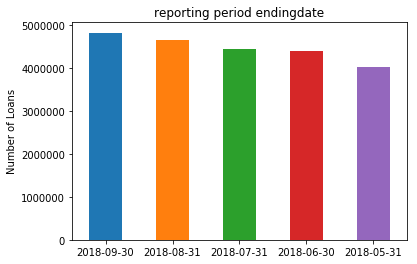

Top  100  counts:  
 2018-09-30    4830178
2018-08-31    4652828
2018-07-31    4441062
2018-06-30    4407679
2018-05-31    4035700
2018-04-30    3755105
2018-03-31    3660354
2018-02-28    3280162
2018-01-31    3185033
2017-12-31    2941041
2018-09-28     135598
Name: reportingperiodendingdate, dtype: int64


In [ ]:
draw(df.reportingperiodendingdate, title='reporting period endingdate', ylabel='Number of Loans', sort = True, n=100)

In [ ]:
df.reportingperiodendingdate.unique()

array(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2017-12-31', '2018-09-28'], dtype=object)

In [ ]:
df['reportingperiodendingdate']=df.reportingperiodendingdate.replace('2018-09-28','2018-09-30')

In [ ]:
# restrict data to a reporting period
#df=df[df.index=='2017-11-30']

In [ ]:
df.reportingperiodendingdate.unique()

array(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2017-12-31'], dtype=object)

### Mean current deliquency days for the reporting period

In [ ]:
df.currentdelinquencystatus.isna().mean()

0.02539739614298785

In [ ]:
df.dropna(subset=['currentdelinquencystatus'], how='all', inplace=True)

In [ ]:
df.currentdelinquencystatus.isna().mean()

0.0

In [ ]:
df.currentdelinquencystatus.unique()

array([  0.,   2.,  14.,   1.,   8.,   7.,  16.,   6.,   4.,   5.,   3.,
         9.,  11.,  10.,  18.,  47.,  32.,  26.,  23.,  13.,  37.,  12.,
        33.,  19.,  20.,  17.,  24.,  15.,  52.,  27.,  41.,  21.,  28.,
        45.,  25.,  68.,  31.,  22.,  29.,  39.,  49.,  90.,  34.,  30.,
        46.,  83.,  42.,  44.,  59.,  76.,  57.,  82.,  43.,  40.,  72.,
        61.,  48.,  35.,  78.,  62.,  38.,  36.,  75.,  53.,  60.,  51.,
        81.,  50.,  71.,  89.,  73.,  74.,  56., 118., 103.,  85.,  54.,
       104.,  80., 100., 109.,  79.,  77., 149., 134.,  91., 101.,  55.,
       135.,  63.,  95.,  67., 121., 123., 117.,  88.,  96., 105.,  69.,
        97.,  58., 151., 102., 175.,  66., 164.,  92.,  93.,  84., 110.,
        64., 107., 128., 136., 182.,  86., 195.,  70., 112.,  99., 115.,
       139., 130.,  65., 212., 120., 179., 166., 116., 198., 127., 140.,
       152., 160., 106., 184., 111., 143., 210.,  87.,  98., 171.,  -9.,
       132., 137., 173., 124., 129.,  -1., 138., 11

In [ ]:
# retaining only loans with non-negative currentdelinquencystatus days
u=pd.value_counts(df.currentdelinquencystatus<0)
if len(u)<2:
    print('No Loans Below zero current deliquency status days')
else: 
    print('Number of Loans with negative current deliquency status days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative current deliquency status days')
    df=df[df.currentdelinquencystatus>=0]

Number of Loans with negative current deliquency status days : 4
Dropping  4 rows and retaining loans with only non-negative current deliquency status days


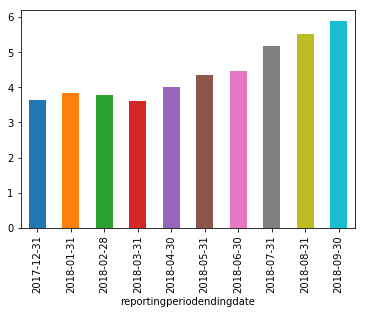

In [ ]:
df.groupby(df.reportingperiodendingdate).currentdelinquencystatus.mean().plot(kind='bar')

### Mean reporting period ending balance

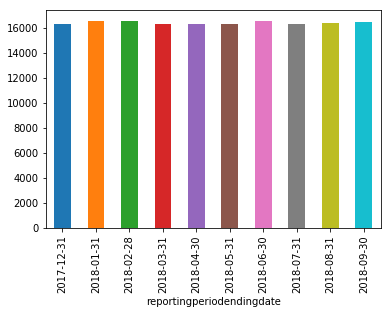

In [ ]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

### Actual end balance amount for all current delinquency status days by reporting period

reportingperiodendingdate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

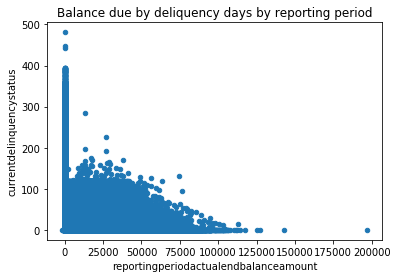

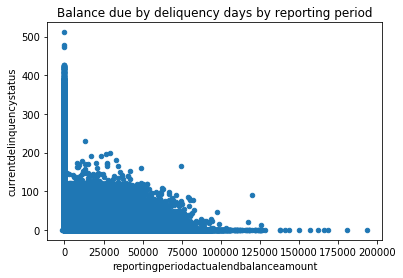

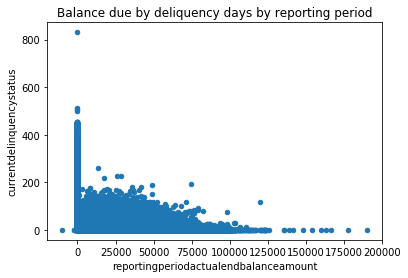

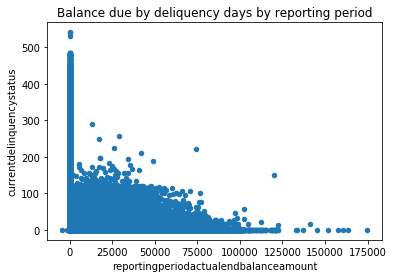

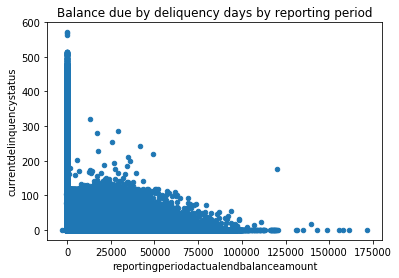

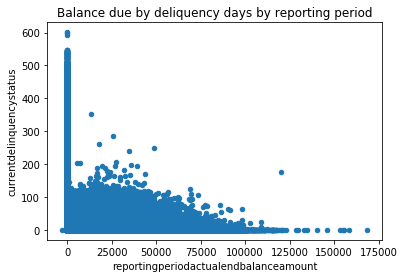

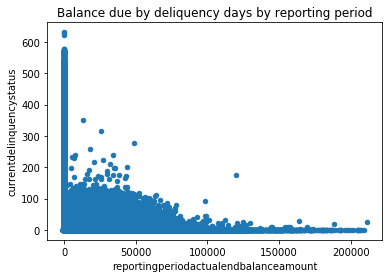

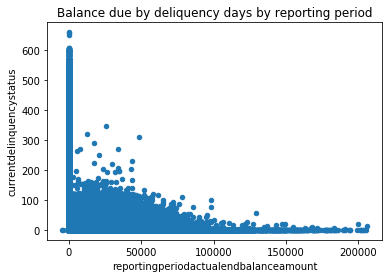

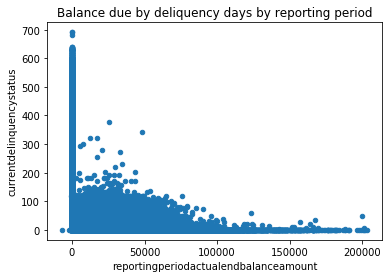

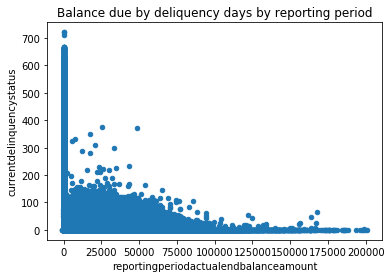

In [ ]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='reportingperiodactualendbalanceamount',y='currentdelinquencystatus', title='Balance due by deliquency days by reporting period')

### Creating Feature columns for Reporting period

In [ ]:
# create feature columns for categories within originator name 
def map_reportingperiodendingdate(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.reportingperiodendingdate).index.tolist()

for code in codes:
        df['reportingperiodending_{}'.format(code)] = list(map(map_reportingperiodendingdate, df.reportingperiodendingdate))
        print('Added Column for :   reportingperiodending_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   reportingperiodending_2018-09-30
Added Column for :   reportingperiodending_2018-08-31
Added Column for :   reportingperiodending_2018-07-31
Added Column for :   reportingperiodending_2018-06-30
Added Column for :   reportingperiodending_2018-05-31
Added Column for :   reportingperiodending_2018-04-30
Added Column for :   reportingperiodending_2018-03-31
Added Column for :   reportingperiodending_2018-02-28
Added Column for :   reportingperiodending_2018-01-31
Added Column for :   reportingperiodending_2017-12-31
New Dataframe shape :  (38325990, 55)


### Calculating Number of Days Loans Outstanding and creating a feature column

In [ ]:
#calculate outstanding days
df['outstandingdays'] = pd.to_datetime(df['reportingperiodendingdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
#draw(df.outstandingdays, title='Outstanding Days', ylabel='Number of Loans', sort = True, n=5)
#remove days string for machine learning
df['outstandingdays']=df.outstandingdays.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
#df.outstandingdays.tail()

### current deliquency status days Vs Loan Outstanding days by the reporting period

reportingperiodendingdate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

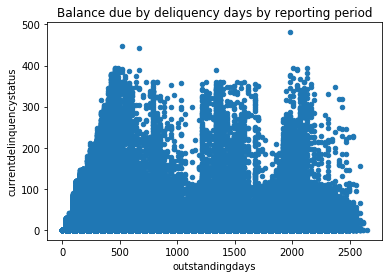

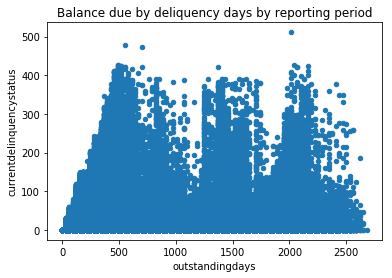

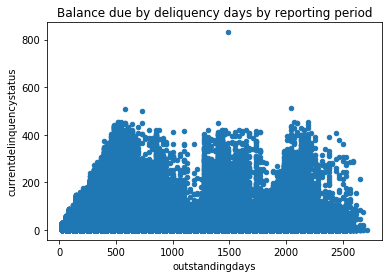

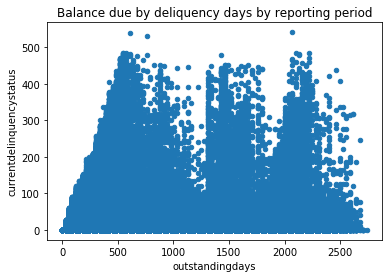

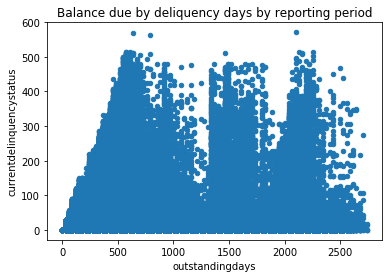

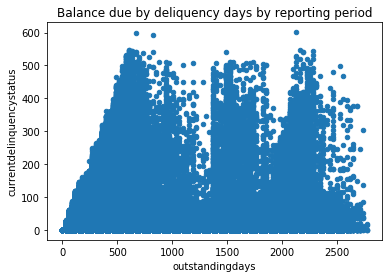

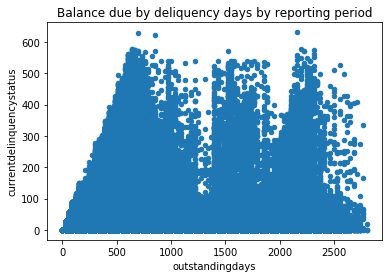

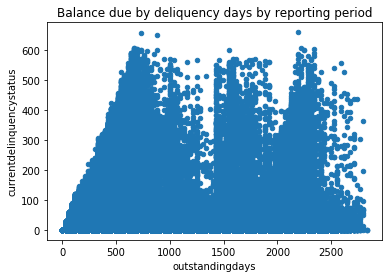

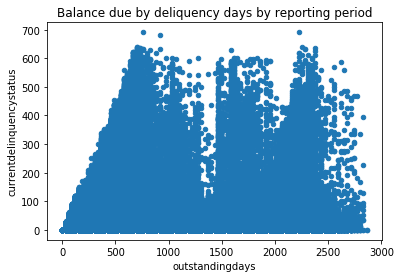

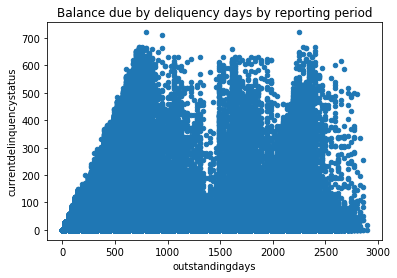

In [ ]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='outstandingdays',y='currentdelinquencystatus', title='Balance due by deliquency days by reporting period')

### Dropping Loans Below Zero Outstanding Days

In [ ]:
# retaining only loans with non-negative outstanding days
u=pd.value_counts(df.outstandingdays<0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.outstandingdays>0]

No Loans Below zero outstanding days


In [ ]:
# get statistics for outstanding days
df.outstandingdays.describe()

count    3.832599e+07
mean     6.248898e+02
std      4.911189e+02
min      0.000000e+00
25%      2.760000e+02
50%      4.870000e+02
75%      7.910000e+02
max      2.891000e+03
Name: outstandingdays, dtype: float64

### Mean outstanding days for the reporting period

In [ ]:
df.groupby(df.reportingperiodendingdate).outstandingdays.mean()

reportingperiodendingdate
2017-12-31    596.708186
2018-01-31    597.162629
2018-02-28    613.825718
2018-03-31    620.705891
2018-04-30    622.592863
2018-05-31    632.435459
2018-06-30    620.073131
2018-07-31    636.851078
2018-08-31    642.952035
2018-09-30    642.555641
Name: outstandingdays, dtype: float64

### Calculate Number of Days Left until Maturity

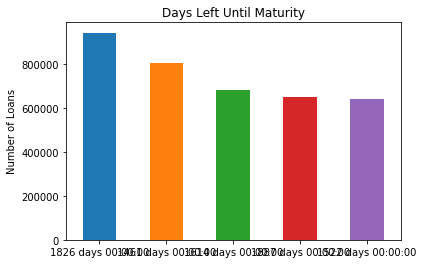

Top  5  counts:  
 1826 days    944269
1461 days    805400
1614 days    683669
1887 days    649146
1522 days    641382
Name: daystomaturity, dtype: int64


In [ ]:
#calculate days left until maturity
df['daystomaturity'] = pd.to_datetime(df['loanmaturitydate'])-pd.to_datetime(df['reportingperiodendingdate'])
draw(df.daystomaturity, title='Days Left Until Maturity', ylabel='Number of Loans', sort=True, n=5)

### Create Feature Column for Days to Maturity

In [ ]:
# remove 'days' string from the data for machine learning
df['daystomaturity']=df.daystomaturity.map(lambda x: np.nan if pd.isnull(x) else x.days)
# print last five rows
df.daystomaturity.tail()

40789588    2070
40789589    2070
40789590    2162
40789591    2070
40789592    1704
Name: daystomaturity, dtype: int64

In [ ]:
#retaining only loans with non-negative days to maturity
u=pd.value_counts(df.daystomaturity<=0)
if len(u)<2:
    print('No Loans Below zero days to maturity')
else: 
    print('Number of Loans with negativedays to maturity :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative days to maturity')
    df=df[df.daystomaturity>0]
#number of rows and columns of the dataframe
df.shape

Number of Loans with negativedays to maturity : 211628
Dropping  211628 rows and retaining loans with only non-negative days to maturity


(38114362, 57)

In [ ]:
# statistics for days to maturity
df.daystomaturity.describe()

count    3.811436e+07
mean     1.414352e+03
std      5.393394e+02
min      2.800000e+01
25%      1.126000e+03
50%      1.522000e+03
75%      1.826000e+03
max      7.944000e+03
Name: daystomaturity, dtype: float64

### Mean days to maturity for the reporting period

In [ ]:
df.groupby(df.reportingperiodendingdate).daystomaturity.mean()

reportingperiodendingdate
2017-12-31    1434.250065
2018-01-31    1432.597700
2018-02-28    1416.168161
2018-03-31    1413.388064
2018-04-30    1413.589661
2018-05-31    1404.781784
2018-06-30    1422.990132
2018-07-31    1407.193564
2018-08-31    1404.534268
2018-09-30    1406.304544
Name: daystomaturity, dtype: float64

### Outstandingdays Vs Days to maturity

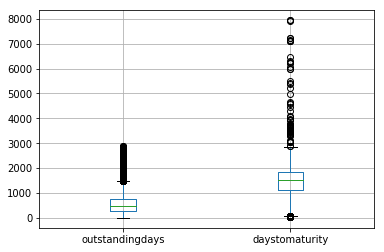

In [ ]:
df[['outstandingdays', 'daystomaturity']].boxplot()

In [ ]:
df.drop(['loanmaturitydate'], axis=1, inplace=True)

### Origination Date - Removing loans before origination cutoff date

In [ ]:
# remove loans with orgination dates set for cut off earlier
u=pd.value_counts(df.originationdate<=cutOffForOriginationDate)
if len(u)<2:
    print('No origination date rows fall before ',cutOffForOriginationDate )
else: 
    print('Number of rows before',cutOffForOriginationDate ,':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with origination dates after', cutOffForOriginationDate)
    df=df[df.originationdate>cutOffForOriginationDate]
#new number of rows and columns of the dataframe
df.shape

Number of rows before 2012-01-01 : 21318
Dropping  21318 rows and retaining loans with origination dates after 2012-01-01


(38093044, 56)

### Top ten mean current deliquency status by origination date and reporting period

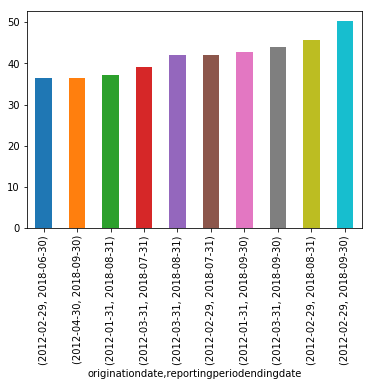

In [ ]:
df.groupby([df.originationdate, df.reportingperiodendingdate]).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

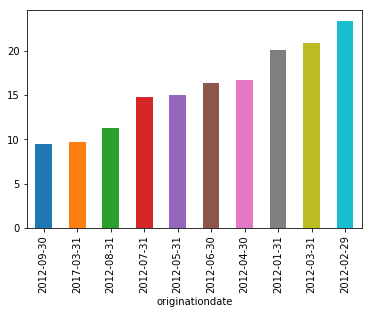

In [ ]:
df.groupby(df.originationdate).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

### Originators Name

In [ ]:
df.originatorname.unique()

array(['BMW Bank of North America', 'BMW Financial Services NA LLC', 'SC',
       'TMCC', 'Mechanics Bank',
       'USAAFSB                                           ', 'AHFC',
       'NMAC', 'Fifth Third Bank', 'VW Credit',
       'MBFS USA LLC                                      ',
       'Ford Credit', 'WORLD OMNI FINANCIAL CORP', 'HCA', 'CBS',
       'GM FINANCIAL', 'Ally Bank'], dtype=object)

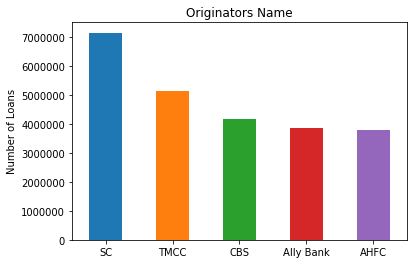

Top  -1  counts:  
 SC                                                    7160720
TMCC                                                  5146840
CBS                                                   4189044
Ally Bank                                             3868821
AHFC                                                  3801613
GM FINANCIAL                                          3762935
NMAC                                                  2679700
Ford Credit                                           1980320
WORLD OMNI FINANCIAL CORP                             1784451
HCA                                                   1620711
Fifth Third Bank                                       517389
BMW Bank of North America                              476824
VW Credit                                              334817
Mechanics Bank                                         290719
USAAFSB                                                280081
MBFS USA LLC                                      

In [ ]:
# draw charts for originators name
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans', sort=True)

### Create Features for Originators

In [ ]:
df['originatorname']=df.originatorname.astype('category')

In [ ]:
df.originatorname.isnull().sum()

0

In [ ]:
df.groupby(df.originatorname).currentdelinquencystatus.mean().sort_values(ascending=False)

originatorname
SC                                                    15.784116
GM FINANCIAL                                           5.375721
CBS                                                    4.089413
HCA                                                    2.426914
Mechanics Bank                                         2.141769
BMW Financial Services NA LLC                          1.319035
Ally Bank                                              1.137996
Ford Credit                                            1.079708
WORLD OMNI FINANCIAL CORP                              0.947916
Fifth Third Bank                                       0.873758
TMCC                                                   0.836680
VW Credit                                              0.480618
AHFC                                                   0.475251
BMW Bank of North America                              0.457599
MBFS USA LLC                                           0.330023
NMAC                     

In [ ]:
# create feature columns for categories within originator name 
def map_originatorname(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.originatorname).index.tolist()

for code in codes:
        df['originator_{}'.format(code)] = list(map(map_originatorname, df.originatorname))
        print('Added Column for :   originator_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   originator_SC
Added Column for :   originator_TMCC
Added Column for :   originator_CBS
Added Column for :   originator_Ally Bank
Added Column for :   originator_AHFC
Added Column for :   originator_GM FINANCIAL
Added Column for :   originator_NMAC
Added Column for :   originator_Ford Credit
Added Column for :   originator_WORLD OMNI FINANCIAL CORP
Added Column for :   originator_HCA
Added Column for :   originator_Fifth Third Bank


In [ ]:
# drop originator name column
df.drop(['originatorname'],axis=1, inplace=True)
# new number of rows and columns
df.shape

### Original Loan Amount

In [ ]:
df.groupby(df.reportingperiodendingdate).originalloanamount.mean()

In [ ]:
# draw chart for original loan amount as filered in the next variable(original_loan_in_excess) 
original_loan_in_excess = 10000
draw(df.originalloanamount>original_loan_in_excess, title='Original Loan Amount', ylabel='Number of Loans', sort=True)

In [ ]:
#draw a chart to view distribution of original loan amount
bins = np.linspace(0, 80000, 1000)
plt.hist(df.originalloanamount, bins, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Number of Loans')
plt.show()

In [ ]:
# get statistics for original loan amount
df.originalloanamount.describe()

### Remove Original Loan Amount Below Zero

In [ ]:
# To remove rows with zero, non-negative or blank values for original loan amount

u=pd.value_counts(df.originalloanamount<=0)
if len(u)<2:
    print('No original loan amount blank or below zero')
else: 
    print('Number of original loan amount rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan amount more than zero')
    df=df[df.originalloanamount>0]
df.shape

### Original Loan Term

In [ ]:
#check for NaN
df.originalloanterm.isna().mean()

In [ ]:
df.groupby(df.reportingperiodendingdate).originalloanterm.mean()

In [ ]:
# draw chart for original loan term based on the input of variable below(original_loan_term_excess)
original_loan_term_excess = 48
draw(df.originalloanterm>original_loan_term_excess, title='Original Loan Terms', ylabel='Number of Loans',sort=True)

In [ ]:
### Top ten delinquency days by the original loan term

In [ ]:
#df.plot(kind='scatter', x='originalloanterm', y='currentdelinquencystatus')
df.groupby(df.originalloanterm).currentdelinquencystatus.mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
#df.originalloanterm.plot(kind='hist', bins=10, title='Original Loan Term')

In [ ]:
#statistics for original loan term
df.originalloanterm.describe()

In [ ]:
# remove rows with zero, blank or negative original loan term

u=pd.value_counts(df.originalloanterm<=0)
if len(u)<2:
    print('No original loan term blank or below zero')
else: 
    print('Number of original loan term rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan term more than zero')
    df=df[df.originalloanterm>0]
# new number of rows and columns of the dataframe
df.shape

### Original loan term effect on current delinquency status days by the reporting period

In [ ]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='originalloanterm',y='currentdelinquencystatus', title='loan term effect on deliquency days by reporting period')

### Original interest rate percentage

In [ ]:
df.originalinterestratepercentage.isna().mean()

In [ ]:
# get statistics for originalinterestratepercentage
df.originalinterestratepercentage.describe()

### Remove interest rates below zero

In [ ]:
# drop rows with blank or negative original interest rate percentage and research on zero interest rate loans
u=pd.value_counts(df.originalinterestratepercentage<0)
if len(u)<2:
    print('No original interest rate blank or below zero')
else: 
    print('Number of original interest rate rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    df=df[df.originalinterestratepercentage>=0]
df.shape

### Retain zero interest loans?

In [ ]:
# view zero original interest rate percentage loans
u=pd.value_counts(df.originalinterestratepercentage==0)
if len(u)<2:
    print('No zero original interest rate percentage')
else: 
    print('Number of zero original interest rate rows',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    #df=df[df.originalinterestratepercentage>=0]
df.shape

### Interest rate percent effect on deliquency days by reporting period

In [ ]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus', title='interest rate percent effect on deliquency days by reporting period')

### Original Interest Rate Type Code

Indicate whether the interest rate on the loan is fixed, adjustable or other. 1: Fixed, 2: Adjustable, 98: Other

In [ ]:
df.originalinterestratetypecode.isna().mean()

In [ ]:
df.originalinterestratetypecode.unique()

Since there are no other categories other than 1: Fixed, We will delete this columns as it is not adding any variability to the model

In [ ]:
df.drop(['originalinterestratetypecode'],axis=1, inplace=True)
df.shape

### Original Interest Only Term Number

Indicate the number of months from origination in which the obligor is permitted to pay only interest on the loan beginning from when the loan was originated.

In [ ]:
df.originalinterestonlytermnumber.isna().mean()

In [ ]:
df.originalinterestonlytermnumber.unique()

Since there are no values in this column, we will delete this column feature

In [ ]:
df.drop(['originalinterestonlytermnumber'],axis=1, inplace=True)
df.shape

### Underwriting Indicator

Indicate whether the loan met the criteria for the first level of solicitation, credit-granting or underwriting criteria used to originate the loan.

In [ ]:
df.underwritingindicator.unique()

In [ ]:
# missing values
df.underwritingindicator.isna().mean()

In [ ]:
df['underwritingindicator']=df.underwritingindicator.astype('category')

In [ ]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans', sort=True)

In [ ]:
df.groupby(df.underwritingindicator).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus', title='interest rate percent effect on deliquency days by reporting period')

### Create Feature Column Underwriting

In [ ]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

### Underwriting TRUE current deliquency status

In [ ]:
#df.loc[df.underwriting_true==1].currentdelinquencystatus.plot(kind='hist', bins=10)
print('Total :',df.loc[df.underwriting_true==1].currentdelinquencystatus.value_counts().sum())
df.loc[df.underwriting_true==1].currentdelinquencystatus.value_counts().head()

### Underwriting FALSE current deliquency status

In [ ]:
#df.loc[df.underwriting_true==0].currentdelinquencystatus.plot(kind='hist', bins=10)
print('Total :',df.loc[df.underwriting_true==0].currentdelinquencystatus.value_counts().sum())
df.loc[df.underwriting_true==0].currentdelinquencystatus.value_counts().head()

### Subvented

Indicate yes or no as to whether a form of subsidy is received on the loan, such as cash incentives or favorable financing for the buyer. 0: No, 1: Yes - Rate Subvention, 2: Yes - Cash Rebate, 98: Yes - Other

In [ ]:
df.subvented.unique()

In [ ]:
df['subvented']=df.subvented.replace('["1"," 2"]','["1","2"]').replace('["1"," 98"]','["1","98"]')

In [ ]:
df.subvented.unique()

In [ ]:
df['subvented']=df.subvented.astype('category')

In [ ]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans', sort=True)

In [ ]:
df.subvented.describe(include='all')

### subvented effect on original interest rate percent and current deliquency days by reporting period

In [ ]:
#label=df.groupby([df.reportingperiodendingdate, df.subvented])
#pd.value_counts(df.reportingperiodendingdate).keys().tolist()
#pd.value_counts(df.subvented).keys().tolist()
# sorted_obj=['["0"]','["1"]','["2"]''["98"]']
# label=[]
# for i in pd.value_counts(df.reportingperiodendingdate).sort_values(ascending=True).keys().tolist():
#     for j in pd.value_counts(df.subvented).sort_values(sorted_obj).keys().tolist():
#         label.append(str(i)+str(j))
# print(label)
#pd.value_counts(df.groupby([df.reportingperiodendingdate, df.subvented])).keys().tolist()


#df.loc[df.underwriting_true==0].currentdelinquencystatus.plot(kind='hist', bins=10)
df.groupby([df.subvented]).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus')

### Create Feature Column for Subvented

In [ ]:
# create feature columns for subvented
def map_subvented(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.subvented).index.tolist()

for code in codes:
        df['subvented_{}'.format(code)] = list(map(map_subvented, df.subvented))
        print('Added Column for :   subvented_'+code)
print('New Dataframe shape : ', df.shape)
df.drop(['subvented'], axis=1, inplace=True)

### Vehicle New or Used code

Indicate whether the vehicle financed is new or used at the time of origination. 1: New, 2: Used

In [ ]:
df.vehiclenewusedcode.unique()

In [ ]:
df['vehiclenewusedcode']=df.vehiclenewusedcode.astype('category')

In [ ]:
draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

### Create Feature Column for New or Used

In [ ]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
print('Added Column for :   vehiclenew_true')
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

### New Vehicles mean deliquency days by the reporting period

In [ ]:
df.groupby([df.reportingperiodendingdate,df.vehiclenew_true]).currentdelinquencystatus.mean()

### Vehicle Type code ---relevancy for machine learning ?

Indicate the code describing the vehicle type. 1: Car, 2:
Truck, 3: SUV, 4: Motorcycle, 98: Other, 99: Unknown

In [ ]:
df.vehicletypecode.unique()

In [ ]:
df['vehicletypecode']=df.vehicletypecode.astype('category')

In [ ]:
df['vehicletypecode']=df.vehicletypecode.replace(1.0,'Car').replace(2.0,'Truck').replace(3.0,'SUV').replace(4.0,'Motorcycle').replace(98.0,'Other').replace(99.0,'Unknown')

In [ ]:
draw(df.vehicletypecode, title='Vehicle Type Code', ylabel='Number of Loans', sort=True)

In [ ]:
df.vehicletypecode.describe()

In [ ]:
df.vehicletypecode.isna().mean()

### Create Features for Vehicle Type Code

In [ ]:
# create feature columns for vehicle type code
def map_vehicletypecode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.vehicletypecode).index.tolist()

for code in codes:
        df['vehicletypecode_{}'.format(code)] = list(map(map_vehicletypecode, df.vehicletypecode))
        print('Added Column for :   vehicletypecode_'+code)
print('New Dataframe shape : ', df.shape)
df.drop(['vehicletypecode'], axis=1, inplace=True)
df.shape

### Obligor Credit Score Type

Specify the type of the standardized credit score used to
evaluate the obligor during the loan origination process

In [ ]:
df.obligorcreditscoretype.unique()

In [ ]:
df['obligorcreditscoretype']=df.obligorcreditscoretype.astype('category')

In [ ]:
df.obligorcreditscoretype.isna().mean()

In [ ]:
df.obligorcreditscoretype.value_counts()

In [ ]:
# #remove = ['Unknown/Invalid', 'None' ]

# u=pd.value_counts(df.obligorcreditscoretype==str('Unknown/Invalid') & ('None'))
# if len(u)<2:
#     print('No blank or zero obligor income verification level code')
# else: 
#     print('Number of loans with no obligor income verification level code',':', u[1])
#     print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
#     #df=df[df.obligorincomeverificationlevelcode>0]
# df.shape

In [ ]:
df=df[~df.obligorcreditscore.astype(str).str.contains('None')]

In [ ]:
pd.value_counts(df.obligorcreditscoretype=='None')

In [ ]:
#df.obligorcreditscore=df.obligorcreditscore.replace('Unknown/Invalid', np.nan)

In [ ]:
#pd.value_counts(df.obligorcreditscoretype)

In [ ]:
#df=df[~df.obligorcreditscore.astype(str).str.contains('Unknown/Invalid')]

In [ ]:
#pd.value_counts(df.obligorcreditscoretype=='Unknown/Invalid')

In [ ]:
#df['obligorcreditscoretype']=df.obligorcreditscoretype.astype('str')

In [ ]:
#pd.value_counts(df.obligorcreditscoretype=='Unknown/Invalid')

In [ ]:
#df=df[~df.obligorcreditscore.astype(str).str.contains('Unknown/Invalid')]

In [ ]:
#pd.value_counts(df.obligorcreditscoretype=='Unknown/Invalid')

In [ ]:
draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans', sort=True)

In [ ]:
df.obligorcreditscoretype.describe()

In [ ]:
df.groupby([df.reportingperiodendingdate,df.obligorcreditscoretype]).currentdelinquencystatus.mean()

### Create features for obligator credit score type

In [ ]:
def map_obligorcreditscoretype(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorcreditscoretype).index.tolist()

for code in codes:
        df['credit_type_{}'.format(code)] = list(map(map_obligorcreditscoretype, df.obligorcreditscoretype))
        print('Added Column for :   credit_type_'+code)

df.shape    

In [ ]:
df.drop(['credit_type_None','credit_type_Unknown/Invalid'], axis=1, inplace=True)

### Obligor Credit Score

Provide the standardized credit score of the obligor used to
evaluate the obligor during the loan origination process

In [ ]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans', sort=True, n=10)

In [ ]:
df.obligorcreditscore.describe()

### Remove and Drop rows of Obligor Credit Score with strings('no score', 'none', 'Nan')

In [ ]:
#search for strings in the columns
q=df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False).sum()
print('Number of Strings in the Columns : ', q)
if q > 0:
    u=df[df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)].obligorcreditscore.unique()
    print('Strings in data : ', u)
    df=df[~df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)]
else:
    print('No strings in the Obligor Credit Score')

In [ ]:
#Number of blanks in the column
df.obligorcreditscore.astype(str).str.contains(r'^(\s+)$').sum()

In [ ]:
#pd.crosstab(df.reportingperiodendingdate, df.obligorcreditscore)

In [ ]:

#df=df[~df.obligorcreditscore.str.contains(r'^([^0-9]*)$', na=False)]

In [ ]:
#df.isnull().sum()

In [ ]:
#df.obligorcreditscore.isnull().value_counts()

In [ ]:
#df[df.obligorcreditscore.isnull()]

In [ ]:
df=df.dropna(subset=['obligorcreditscore'])

In [ ]:
df.obligorcreditscore.value_counts(dropna=False).sort_values(ascending=False).head()

In [ ]:
df.obligorcreditscore.isnull().values.any()

In [ ]:
df['obligorcreditscore']=df.obligorcreditscore.astype('float')

In [ ]:
df.groupby([df.reportingperiodendingdate, df.obligorcreditscoretype]).obligorcreditscore.mean()

In [ ]:
df.drop(['obligorcreditscoretype'], axis=1, inplace=True)

### Obligor Income Verification Level Code

Indicate the code describing the extent to which the
obligor's income was verified during the loan origination
process. 1: Not stated, not verified, 2: Stated, not verified,
3: Stated, verified but not to level 4 or level 5., 4: Stated,
"level 4" verifiedLevel 4 income verification = Previous year
W-2 or tax returns, and year-to-date pay stubs, if salaried. If
self-employed, then obligor provided 2 years of tax returns.,
5: Stated, "level 5" verifiedLevel 5 income verification = 24
months income verification (W-2s, pay stubs, bank
statements and/or tax returns). If self-employed, then
obligor provided 2 years tax returns plus a CPA certification
of the tax returns.

In [ ]:
df.obligorincomeverificationlevelcode.isna().mean()

In [ ]:
df['obligorincomeverificationlevelcode']=df.obligorincomeverificationlevelcode.astype('category')

In [ ]:
df=df.dropna(subset=['obligorincomeverificationlevelcode'])

In [ ]:
df.obligorincomeverificationlevelcode.isna().mean()

In [ ]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [ ]:
df.obligorincomeverificationlevelcode.describe()

In [ ]:
pd.value_counts(df.obligorincomeverificationlevelcode)

In [ ]:
u=pd.value_counts(df.obligorincomeverificationlevelcode==0)
if len(u)<2:
    print('No blank or zero obligor income verification level code')
else: 
    print('Number of loans with no obligor income verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
    df=df[df.obligorincomeverificationlevelcode>0]
df.shape

In [ ]:
df.groupby([df.reportingperiodendingdate, df.obligorincomeverificationlevelcode]).obligorcreditscore.mean()

In [ ]:
df.groupby([df.reportingperiodendingdate, df.obligorincomeverificationlevelcode]).currentdelinquencystatus.mean()

### Create Feature Columns for Obligor Income Verification Code

In [ ]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_code_{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))
        print('Added Column for :   income_code_'+str(code))
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)
df.shape

### Obligor Employment Verification Code

Indicate the code describing the extent to which the
obligor's employment was verified during the loan
origination process. 1: Not stated, not verified, 2: Stated,
not verified, 3: Stated, level 3 verified Level 3 verified =
Direct independent verification with a third party of the
obligors current employment.

In [ ]:
df.obligoremploymentverificationcode.isna().mean()

In [ ]:
df['obligoremploymentverificationcode']=df.obligoremploymentverificationcode.astype('category')

In [ ]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans', sort=True)

In [ ]:
df.obligoremploymentverificationcode.describe()

In [ ]:
u=pd.value_counts(df.obligoremploymentverificationcode==0)
if len(u)<2:
    print('No blank or zero obligor employment verification level code')
else: 
    print('Number of loans with no obligor employment verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor employment verification level code')
    df=df[df.obligoremploymentverificationcode>0]
df.shape

In [ ]:
df.groupby([df.reportingperiodendingdate, df.obligoremploymentverificationcode]).obligorcreditscore.mean()

In [ ]:
df.groupby([df.reportingperiodendingdate, df.obligoremploymentverificationcode]).currentdelinquencystatus.mean()

### Create feature Columns for obligor employment verification

In [ ]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['empl_code_{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))
        print('Added Column for :   empl_code_'+str(code))
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)
df.shape

### Co-obligator Indicator

Indicate whether the loan has a co-obligor.

In [ ]:
df.coobligorindicator.isna().mean()

In [ ]:
df['coobligorindicator']=df.coobligorindicator.astype('category')

In [ ]:
df.coobligorindicator.describe()

In [ ]:
draw(df.coobligorindicator, title='Co-Obligator Indicator', ylabel='Number of Loans', sort=True)

In [ ]:
df.groupby([df.reportingperiodendingdate, df.coobligorindicator]).obligorcreditscore.mean()

In [ ]:
df.groupby([df.reportingperiodendingdate, df.coobligorindicator]).currentdelinquencystatus.mean()

### Create features for Co-obligator Indicator

In [ ]:
def map_coobligorindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['coobligorindicator_true'] = list(map(map_coobligorindicator_true, df.coobligorindicator))
df.drop(['coobligorindicator'], axis=1, inplace=True)
print('Added Column for :   coobligorindicator_true')
pd.value_counts(df.coobligorindicator_true)

### Reporting Period Actual End Balance Amount

Mean reporting period actual end balance amount by the reporting period ending date

In [ ]:
df.reportingperiodactualendbalanceamount.isna().mean()

In [ ]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

In [ ]:
df.reportingperiodactualendbalanceamount.describe()

In [ ]:
df.groupby([df.reportingperiodendingdate]).reportingperiodactualendbalanceamount.mean()

In [ ]:
df.groupby([df.reportingperiodendingdate]).plot(kind='scatter', x='reportingperiodactualendbalanceamount',y='currentdelinquencystatus')

### Dropping loans with zero or negative reporting period actual end balance amount

In [ ]:
u=pd.value_counts(df.reportingperiodactualendbalanceamount<=0)
if len(u)<2:
    print('No blank or zero or negative reporting period actual end balance amount')
else: 
    print('Number of loans with no reporting period actual end balance amount',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with reporting period actual end balance amount')
    df=df[df.reportingperiodactualendbalanceamount>0]
df.shape

### Total Actual amount paid...keep or drop?

In [ ]:
#df.totalactualamountpaid.isna().mean()

In [ ]:
#df=df.dropna(subset=['totalactualamountpaid'])

In [ ]:
#df.totalactualamountpaid.describe()

In [ ]:
# u=pd.value_counts(df.totalactualamountpaid<=0)
# if len(u)<2:
#     print('No blank or zero or negative total actual amount paid')
# else: 
#     print('Number of loans with no or negative total actual amount paid',':', u[1])
#     #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
#     #df=df[df.totalactualamountpaid>0]
# df.shape

## Actual interest collected amount...drop?

In [ ]:
df.actualinterestcollectedamount.isna().mean()

In [ ]:
df.actualinterestcollectedamount.describe()

In [ ]:
u=pd.value_counts(df.actualinterestcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual interest collected amount')
else: 
    print('Number of loans with no or negative actual interest collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual interest collected amount')
    #df=df[df.actualinterestcollectedamount>0]
df.shape

### Actual principal collected amount..drop ?

In [ ]:
df.actualprincipalcollectedamount.isna().mean()

In [ ]:
df.actualprincipalcollectedamount.describe()

In [ ]:
u=pd.value_counts(df.actualprincipalcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual principal collected amount')
else: 
    print('Number of loans with zero or negative actual principal collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual principal collected amount')
    #df=df[df.actualprincipalcollectedamount>0]
df.shape

### Interest paid through date Drop?

In [ ]:
df.interestpaidthroughdate.isna().mean()
#pd.value_counts(df.interestpaidthroughdate).head(n=10)

In [ ]:
df.interestpaidthroughdate.isna().sum()

In [ ]:
df.interestpaidthroughdate.describe()

### Dropping interest paid through date '1900-01-01'

In [ ]:
u=pd.value_counts(df.interestpaidthroughdate=='1900-01-01')
if len(u)<2:
    print('No blank or zero interest paid throughdate as 1900-01-01')
else: 
    print('Number of loans with zero or 1900-01-01 as  interest paid throughdate',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

### Dropping interest paid through data

In [ ]:
df.drop(['interestpaidthroughdate'], axis=1, inplace=True)
df.shape

### Number of Days from origination to first payment date

In [ ]:
df.originalfirstpaymentdate.isna().mean()

In [ ]:
df['daystofirstpayment'] = pd.to_datetime(df['originalfirstpaymentdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.daystofirstpayment, title='Days to First Payment', ylabel='Number of Loans', sort = True, n=5)

In [ ]:
df.daystofirstpayment.describe()

### Create a new feature for number of days to first payment

In [ ]:
#remove days string for machine learning
df['daystofirstpayment']=df.daystofirstpayment.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.daystofirstpayment.tail()

### Number of loans with zero days to first payment

In [ ]:
u=pd.value_counts(df.daystofirstpayment==0)
if len(u)<2:
    print('No blank or zero days to first payment')
else: 
    print('Number of loans with zero days to first payment',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.daystofirstpayment>0]
df.shape

In [ ]:
df.groupby([df.reportingperiodendingdate]).daystofirstpayment.mean()

In [ ]:
#df.groupby([df.reportingperiodendingdate]).plot(kind='scatter', x='daystofirstpayment',y='currentdelinquencystatus')

In [ ]:
df.drop(['originalfirstpaymentdate'], axis=1, inplace=True)
df.shape

### Grace Period Number

Indicate the number of months during which time interest accrues but no payments are due from the obligor.

In [ ]:
df.graceperiodnumber.isna().mean()

In [ ]:
draw(df.graceperiodnumber, title='Grace period Number', ylabel='Number of Loans', sort = True)

In [ ]:
df.graceperiodnumber.describe()

In [ ]:
df.groupby([df.reportingperiodendingdate]).graceperiodnumber.mean()

### Number of loans with zero grace period

In [ ]:
u=pd.value_counts(df.graceperiodnumber==0)
if len(u)<2:
    print('No blank or zero grace period number')
else: 
    print('Number of loans with zero grace period number',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive grace period number')
    #df=df[df.graceperiodnumber>0]
df.shape

### Asset added indicator...not included

Indicate yes or no whether the asset was added during the
reporting period. Instruction: A response to this data point
is only required when assets are added to the asset pool
after the final prospectus is filed

In [ ]:
df['assetaddedindicator']=df.assetaddedindicator.astype('category')

In [ ]:
df.assetaddedindicator.unique()

In [ ]:
df.assetaddedindicator.isna().mean()

In [ ]:
draw(df.assetaddedindicator, title='Asset Added Indicator', ylabel='Proportion of Loans', sort = False, n=2)

In [ ]:
df.assetaddedindicator.describe()

In [ ]:
u=pd.value_counts(df.assetaddedindicator!=False)
if len(u)<2:
    print('No blank or zero Asset Added Indicator')
else: 
    print('Number of loans with zero or blank Asset Added Indicator',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive asset added indicator')
    #df=df[df.assetaddedindicator>0]
df.shape

In [ ]:
df.groupby([df.reportingperiodendingdate, df.assetaddedindicator]).currentdelinquencystatus.mean()

In [ ]:
df.groupby([df.reportingperiodendingdate, df.assetaddedindicator]).obligorcreditscore.mean()

In [ ]:
df.drop(['assetaddedindicator'], axis=1, inplace=True)
df.shape

### Reporting Period Modification Indicator.. added for now. would it reveal delinquency?

Indicates yes or no whether the loan was modified from its
original terms during the reporting period.

In [ ]:
df.reportingperiodmodificationindicator.isna().mean()

In [ ]:
df['reportingperiodmodificationindicator']=df.reportingperiodmodificationindicator.astype('category')

In [ ]:
draw(df.reportingperiodmodificationindicator, title='Reporting Period Modification Error', ylabel='Proportion of Loans', sort = True)

In [ ]:
df.reportingperiodmodificationindicator.describe()

In [ ]:
df.groupby([df.reportingperiodendingdate, df.reportingperiodmodificationindicator]).currentdelinquencystatus.mean()

In [ ]:
df.groupby([df.reportingperiodendingdate, df.reportingperiodmodificationindicator]).obligorcreditscore.mean()

### Create Features for Reporting Period Modification Indicator True

In [ ]:
def map_reportingperiodmodificationindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['reportingperiodmodificationindicator_true'] = list(map(map_reportingperiodmodificationindicator_true, df.reportingperiodmodificationindicator))
print('Added Column for :   reportingperiodmodificationindicator_true')
df.drop(['reportingperiodmodificationindicator'], axis=1, inplace=True)
pd.value_counts(df.reportingperiodmodificationindicator_true)

In [ ]:
df.shape

### Servicing Advance Method Code...revealing default status!...Not included

Specify the code that indicates a servicer's responsibility for
advancing principal or interest on delinquent loans. 1: No
advancing, 2: Interest only, 3: Principal only, 4: Principal and
Interest, 99: Unavailable

In [ ]:
#df.servicingadvancemethodcode.isna().mean()

In [ ]:
#df['servicingadvancemethodcode']=df.servicingadvancemethodcode.astype('category')

In [ ]:
#draw(df.servicingadvancemethodcode, title='Serving Advance Method Code', ylabel='Number of Loans', sort = True, n=100)

In [ ]:
#df.servicingadvancemethodcode.describe()

In [ ]:
#df.groupby([df.reportingperiodendingdate, df.servicingadvancemethodcode]).obligorcreditscore.mean()

In [ ]:
#df.groupby([df.reportingperiodendingdate, df.servicingadvancemethodcode]).currentdelinquencystatus.mean()

### Create Feature Columns for Servicing Advance Method Codes

In [ ]:
# def map_servicingadvancemethodcode(*args):
#     columns = [col for col in args]
#     for column in columns:
#         if column == code:
#             return 1
#         else:
#             return 0
# codes = pd.value_counts(df.servicingadvancemethodcode).index.tolist()

# for code in codes:
#         df['servicingadvancemethod_code_{}'.format(code)] = list(map(map_servicingadvancemethodcode, df.servicingadvancemethodcode))
#         print('Added Column for :   servicingadvancemethod_code_'+str(code))
# df.drop(['servicingadvancemethodcode'], axis=1, inplace=True)
# df.shape

### Dropped Other Principal Adjustment Amount...negative amt?

Indicate any other amounts that caused the principal balance of the loan to be decreased or increased during the reporting period.

In [ ]:
#df.otherprincipaladjustmentamount.isna().mean()

In [ ]:
#df.otherprincipaladjustmentamount.describe()

In [ ]:
# u=pd.value_counts(df.otherprincipaladjustmentamount<=0)
# if len(u)<2:
#     print('No blank other principal adjustment amount')
# else: 
#     print('Number of loans with zero or negative principal adjustment amount',':', u[1])
#     #print('Dropping ', u[1], 'rows and retaining loans with other principal adjustment amount')
#     #df=df[df.otherprincipaladjustmentamount>0]
# df.shape

In [ ]:
df.drop(['otherprincipaladjustmentamount'], axis=1, inplace=True)

###  Dropped Zero Balance Effective Date..check correlation with target(current)

Provide the date on which the loan balance was reduced to
zero.

In [ ]:
#df.zerobalanceeffectivedate.isna().mean()

In [ ]:
#df.zerobalanceeffectivedate.describe()

### Dropped now.....Adding new features for Days to Zero Balance Effective Date from Origination Date

In [ ]:
# for i in pd.value_counts(df.zerobalanceeffectivedate).keys().tolist():
#     if i>cutOffForOriginationDate:
#         df['zerobalanceeffectivedate_calc'] = pd.to_datetime(df['zerobalanceeffectivedate'])-pd.to_datetime(df['originationdate'])
# df['zerobalanceeffectivedate_calc']=df.zerobalanceeffectivedate_calc.map(lambda x: np.nan if pd.isnull(x) else x.days)
# print('Added Column for :   zerobalanceeffectivedate_calc')
#df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

In [ ]:
#df.zerobalanceeffectivedate_calc.describe()

In [ ]:
#df.zerobalanceeffectivedate_calc.fillna(0, inplace=True)

In [ ]:
#df.zerobalanceeffectivedate_calc.isna().mean()

In [ ]:
df.drop(['zerobalanceeffectivedate'], axis=1, inplace=True)
df.shape

In [ ]:
#df.drop(['zerobalanceeffectivedate_calc'], axis=1, inplace=True)

### Dropped now Zero Balance Code..correlation with being current

Provide the code that indicates the reason the loan's
balance was reduced to zero. 1: Prepaid or Matured, 2:
Third-party Sale, 3: Repurchased or Replaced, 4: Chargedoff,
5: Servicing Transfer, 99: Unavailable

In [ ]:
#df.zerobalancecode.isna().mean()

In [ ]:
#df['zerobalancecode']=df.zerobalancecode.astype('category')

In [ ]:
#pd.value_counts(df.zerobalancecode)

In [ ]:
df.drop(['zerobalancecode'], axis=1, inplace=True)

In [ ]:
# draw(df.zerobalancecode, title='Zero Balance Code', ylabel='Number of Loans', sort = True, n=100)

### Create feature column for zero balance code

In [ ]:
# def map_zerobalancecode(*args):
#     columns = [col for col in args]
#     for column in columns:
#         if column == code:
#             return 1
#         else:
#             return 0
# codes = pd.value_counts(df.zerobalancecode).index.tolist()

# for code in codes:
#         df['zerobalance_{}'.format(code)] = list(map(map_zerobalancecode, df.zerobalancecode))
#         print('Added Column for :   zerobalance_'+code)
# df.drop(['zerobalancecode'], axis=1, inplace=True)
# df.shape

## Add External S&P Experian default index and historical data

In [ ]:
#df.to_csv(path+"prod/processed_prod_Dec_to_Sep_ns_other_before_sp.csv", chunksize=100000)

In [ ]:
# df=pd.read_csv(path+'prod/processed_prod_Dec_to_Sep_ns_other_before_sp.csv', 
#                #usecols=use_list, 
#                #sep='\t',
#                #compression=bz2,
#                #nrows=nrows,
#                low_memory=True, 
#               #index_col='abs_loan.reportingperiodendingdate', 
#                parse_dates=True
#               )

In [ ]:
#df.head()

In [ ]:
df.drop(['reportingperiodbeginningdate'], axis=1, inplace=True)

In [ ]:
df=df.set_index('reportingperiodendingdate')

In [ ]:
df['cik']=df.cik.astype('category')

In [ ]:
df.cik.unique()

In [ ]:
df.assetnumber.unique()

In [ ]:
pd.value_counts(df.assetnumber)

In [ ]:
df.assetnumber=df.assetnumber.astype('object')

In [ ]:
df1=pd.read_csv(path+'datasets/s&pExperianAutoDefaultIndex.csv', index_col=0)
df=df.join(df1)
df2=pd.read_csv(path+'datasets/experianHistDefaultRates.csv', index_col=0)
df=df.join(df2)

In [ ]:
df.head()

In [ ]:
# df.drop(['cik', 'assetnumber','originationdate'], axis=1, inplace=True)
# df.shape     

# Clean data

In [ ]:
# change columns to lower case and remove prefix to enable pandas to work
#column_list=[x.lower() for x in (column_list)]
#df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [ ]:
df.isnull().values.any()

# Loan Statistics

In [ ]:
df.describe()

## Deliquency Buckets Current Vs Non-Current

In [ ]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [ ]:
df.currentdelinquencystatus.describe()

In [ ]:
df.currentdelinquencystatus.isna().mean()

In [ ]:
u=pd.value_counts(df.currentdelinquencystatus==''.index) 
if len(u)<2:
    print('No blank current delinquency status')
else: 
    print('Number of loans with blank current delinquency status',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

## Label Creation for Machine Learning

In [ ]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > 0:
            return 1
        elif column == 0:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

### Loan Balance Amount at the End of Reporting Period

In [ ]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, 
         #density=True, 
         label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, 
         #density=True, 
         label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Number of of Loans')
plt.show()

### Manual oversampling of default data 

In [ ]:
# #def manual_oversampling(df):
# default=df[df.label==1]
# print('default: ',default.shape)
# b=int((df.shape[0]-default.shape[0])/(default.shape[0]))
# print('copy default data ',b, ' times')
# b=int(b*manualOversamplingFactor)
# print(b)
# for i in range(b):
#     df=df.append(default, ignore_index=True)
# df=df.sample(frac=1).reset_index(drop=True)
# draw(df.label, title='Manual Oversampling -Current Vs Non-Current', ylabel='Number of Loans', sort=True)
# print(df.shape)
# print(pd.value_counts(df.label==1))
# #return df
   

In [ ]:
# #manual_oversampling(df)
# print(pd.value_counts(df.label==1))
# df.shape

In [ ]:
#df.dtypes

### Oversampling with SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
# #Apply SMOTE to create synthetic observations from minority class
# #Source:https://github.com/scikit-learn-contrib/imbalanced-learn
# from imblearn.over_sampling import SMOTE #Over sampling
# sm = SMOTE(ratio='auto',kind='regular')
# X_sampled,y_sampled = sm.fit_sample(X,y.values.ravel())

# #Percentage of fraudlent records in original data
# Source_data_no_fraud_count = len(data[data.Class==0])
# Source_data_fraud_count = len(data[data.Class==1])
# print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

# #Percentage of fraudlent records in sampled data
# Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
# Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
# print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

### Naive Random Oversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

#  Clean up for Machine Learning

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().any().sum()

In [ ]:
pd.value_counts(df.label, dropna=False)

Dropping NaN rows for the label(current Vs Non-current)

In [ ]:
df.label.dropna(inplace=True)

In [ ]:
pd.value_counts(df.label, dropna=False)

In [ ]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

Dropping NaN rows for payment to income percentage

In [ ]:
df.paymenttoincomepercentage.dropna(inplace=True)

In [ ]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

In [ ]:
df['servicingflatfeeamount']=df.servicingflatfeeamount.astype('float')
pd.value_counts(df.servicingflatfeeamount, dropna=False)

Populating blank servicing flat fee amount with zeros

In [ ]:
df.servicingflatfeeamount.fillna(0,inplace=True)

In [ ]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

Populate blank rows of reporting period beginning loan balance amount with zeros

In [ ]:
df.reportingperiodbeginningloanbalanceamount.fillna(0, inplace=True)

In [ ]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

In [ ]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

Populate blank other servicer fee retained by servicer with zeros

In [ ]:
df.otherservicerfeeretainedbyservicer.fillna(0, inplace=True)

In [ ]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

In [ ]:
# pd.value_counts(df.serviceradvancedamount, dropna=False).head()

Populate blank servicer advance amount with zeros

In [ ]:
#df.serviceradvancedamount.fillna(0, inplace=True)

In [ ]:
#pd.value_counts(df.serviceradvancedamount, dropna=False).head()

In [ ]:
df.isnull().any()

In [ ]:
### Treating Missing values and NaN for Payment to Income Pecentage?

In [ ]:
df.paymenttoincomepercentage.value_counts(dropna=False)

### Payment to income percentage flag(flag yes when the data is available)

In [ ]:
df.paymenttoincomepercentage.fillna(0, inplace=True)

In [ ]:
u=pd.value_counts(df.paymenttoincomepercentage==0)
print(u)

In [ ]:
def map_paymenttoincomepercentage_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column > 0:
            return 1
        else:
            return 0
        
df['paymenttoincomepercentage_true'] = list(map(map_paymenttoincomepercentage_true, df.paymenttoincomepercentage))
print('Added Column for :   paymenttoincomepercentage_true')
pd.value_counts(df.paymenttoincomepercentage_true)

In [ ]:
df.head()

In [ ]:
df.to_csv(path+"prod/processed_prod_Dec_to_Sep_ns_other_before_sp.csv", chunksize=10000)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().any().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape 

In [ ]:
df.dtypes

# Feature Engineering

1. Missing Values
2. Standard Deviation- Amount of Variation
3. Pairwise Correlation
4. Multi Co-linearity
5. Correlation with the labels
6. Cluster Analysis/Dimensionality Reduction


### 1. Missing Values

In [ ]:
df.isnull().any().sum()

### 2. Standard Deviation - Amount of Variation

In [ ]:
df.std()

### 3. Pairwise Correlation

In [ ]:
corr=df.corr()

In [ ]:
corr.to_csv(path+'datasets/corr_prod_ns.csv')

In [ ]:
#plt.matshow(df.corr(), figsize=(20,10))
plt.matshow(df.corr())

In [ ]:
corr.shape

In [ ]:
corr.isna().mean().sum()

In [ ]:
corr.fillna(0, inplace=True)

In [ ]:
corr.isna().mean().sum()

In [ ]:
plt.matshow(corr)

### 4. Correlation with Labels

In [ ]:
corr.label.plot(kind='bar', figsize=(20,10))

### 5 Check for muti co-linearity

In [ ]:
eigenvalue, eigenvector = np.linalg.eig(corr)

In [ ]:
np.savetxt(path+'datasets/eigenvalue_prod_ns.csv', eigenvalue, delimiter=",")
np.savetxt(path+'datasets/eigenvector_prod_ns.csv', eigenvector, delimiter=",")

In [ ]:
evector=pd.DataFrame(eigenvector, columns=corr.columns.tolist())
evector

## Feature Selection

Why select features?
1. Some algorithms scale (computationally) poorly with increased dimension
2. Irrelevant features can confuse some algorithms
3. Redundant features adversely affect regularization
4. Removal of features can increase generalization)

#### Feature Selection Methods
1. Agnostic
    Preprocessing based methods 
        - Remove a binary feature if 'True' in very few or most samples
2. Filter Feature Selection methods
        - Use some ranking criteria to rank
        - Select the top ranking features
3. Wrapper Methods (keep the learning algorithm in the loop)
        - Requires repeated runs of the learning algorithm with different set of features
        - Can be computationally expensive
4. Heuristics 
        - much faster than wrapper methods
5. Correlation Critera
        - Rank features in order of their correlation with the labels
6. Forward Search, Backward Search and step-wise search
        -Forward Search
            Start with no features
            Greedily include the most relevant feature
            Stop when selected the desired number of features
        - Backward Search
            Start with all the features
            Greedily remove the least relevant feature
            Stop when selected the desired number of features
        - Stepwise
            -reevauate all features after each forward search
            -Any feature can be removed after each step
  

#### 4. Huristics 

#### BIC and AIC
Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. 
They are used for choosing best features and often used for comparing nonnested models, which ordinary statistical tests cannot do. The AIC or BIC for a model is usually written in the form [-2logL + kp], where L is the likelihood function, p is the number of parameters in the model, and k is 2 for AIC and log(n) for BIC. In our case, we do not require AIC and BIC techniques for finding the best features due to the simplicity of our model and the number of features being less than 100.

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. 
AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, so that a lower AIC means a model is considered to be closer to the truth. BIC is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup, so that a lower BIC means that a model is considered to be more likely to be the true model. Both criteria are based on various assumptions and asymptotic approximations. Each, despite its heuristic usefulness, has therefore been criticized as having questionable validity for real world data. But despite various subtle theoretical differences, their only difference in practice is the size of the penalty; BIC penalizes model complexity more heavily. The only way they should disagree is when AIC chooses a larger model than BIC.

### Feature Union

It is beneficial to combine several methods to obtain good performance. We use FeatureUnion to combine features obtained by PCA and univariate selection.
Combining features using this transformer has the benefit that it allows cross validation and grid searches over the whole process.

In [ ]:
# y=df.label.values
# x=df.values

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.svm import SVC
# # If dataset is way too high-dimensional. Better do PCA:
# pca = PCA(n_components=2)

# # Maybe some original features where good, too?
# selection = SelectKBest(k=1)

# # Build estimator from PCA and Univariate selection:

# combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# # Use combined features to transform dataset:
# x_features = combined_features.fit(x, y).transform(x)
# print("Combined space has", x_features.shape[1], "features")

# svm = SVC(kernel="linear")

# # Do grid search over k, n_components and C:

# pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])

# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
# grid_search.fit(x, y)
# print(grid_search.best_estimator_)

### Save the dataframe

In [ ]:
df.to_csv(path+"prod/processed_abs_loans_prod_Dec_to_Sep_ns_other_before_sp1.csv", chunksize=10000)

### Preparing data for Machine Learning

In [ ]:
# # prepare label for scikit-learn
# Y=df.label.values
# Y.shape

In [ ]:
# # reshape labels for machine learning
# Y=Y.reshape(Y.shape[0],1)
# Y.shape

In [ ]:
# # prepare input data for scikit-learn
# input=df.values
# input.shape

In [ ]:
# # calculate train/test split
# len_train = int(len(input)*train_split)
# print(len_train)

In [ ]:
# # apply train/test split to labels
# y_train = Y[0:len_train]
# y_test = Y[len_train:]

In [ ]:
# #reshape input data for machine learning
# input=input.reshape(input.shape[0], input.shape[1], 1)
# input.shape

In [ ]:
# # apply train/test split to input data
# x_train = input[0:len_train]
# x_test = input[len_train:]
# x_train.shape

### Scikit-Learn Scaling

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

In [ ]:
# x_scaler=StandardScaler()
# x_train = x_scaler.fit_transform(x_train)
# x_test = x_scaler.fit_transform(x_test)

### Keras Scaling - Normalize

In [ ]:
# x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
# x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
# x_train_keras_scaled.shape

### Linear Support Vector Machine Algorithm

Linear Support Vector Classification.
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [ ]:
# from sklearn import svm, neighbors
# lsvc=svm.LinearSVC()
# clf_lsvc=lsvc.fit(x_train, y_train)
# confidence_lsvc=clf_lsvc.score(x_test, y_test)

### K-Nearest Neighbors Algorithm

In [ ]:
# knn=neighbors.KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
# clf_knn=knn.fit(x_train, y_train)
# confidence_knn=clf_knn.score(x_test, y_test)

### Random Forest Tree Algorithm

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

In [ ]:
# rfor=RandomForestClassifier()
# clf_rfor = rfor.fit(x_train, y_train)
# confidence_rfor=clf_rfor.score(x_test, y_test)

### Logistic Regression Algorithm

In [ ]:
# lr = LogisticRegression(solver='lbfgs')
# clf_lr = lr.fit(x_train, y_train)
# confidence_lr=clf_lr.score(x_test, y_test)

### Gaussian Naive Bayes Algorithm

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# clf_gnb = gnb.fit(x_train, y_train)
# confidence_gnb=clf_gnb.score(x_test, y_test)

### Deep Learning - GRU

In [ ]:

# model = keras.Sequential()
# model.add(keras.layers.GRU(128, activation='relu',  
#                            kernel_regularizer=regularizers.l2(0.01), 
#                            input_shape=(x_train_keras_scaled.shape[1:]), 
#                            return_sequences=True))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.GRU(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Dense(8, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.Dense(2, activation='softmax'))

# optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
# model.summary()

### Model Configuration

In [ ]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

### Train the Model

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test_keras_scaled, y_test), batch_size=8192, 
#         # callbacks = [
#    # baseLogger,
#     #history,
#     #tensorboard
#     #learningRateScheduler,
#     #reduceLROnPlateau
#      #    ], 
#           shuffle=False
# )


### Save the Model

In [ ]:
# model.save(path+'model/'+name+'.h5')

In [ ]:
# test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

In [ ]:
# y_pred = model.predict_classes(x_test)

In [ ]:
#print(y_pred)

In [ ]:
#len(y_pred)

In [ ]:
# np.count_nonzero(y_pred)

In [ ]:
# np.count_nonzero(y_test)

### Load Saved Model

In [ ]:
#saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [ ]:
# test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

### Predict Classes

In [ ]:
x_pred = x_test

In [ ]:
# prediction_gru = model.predict_classes(x_pred)
# prediction_lsvc = clf_lsvc.predict(x_pred)
# prediction_knn = clf_knn.predict(x_pred)
# prediction_rfor = clf_rfor.predict(x_pred)
# prediction_lr = clf_lr.predict(x_pred)
# prediction_gnb = clf_gnb.predict(x_pred)

In [ ]:
# predictions = [
#   prediction_gru,
#     prediction_lsvc,
#     prediction_knn,
#     prediction_rfor,
#     prediction_lr,
#     prediction_gnb 
]

### Confusion Matrix

In [ ]:
# class_names = ['Current', 'Non-Current']

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()

# for prediction in predictions:
#         print('ROC_AUC_SCORE ; ', roc_auc_score(y_test, prediction))
#         # Compute confusion matrix
#         cnf_matrix = confusion_matrix(y_test, prediction)
#         np.set_printoptions(precision=2)

#         # Plot non-normalized confusion matrix
#         plt.figure()
#         plot_confusion_matrix(cnf_matrix, classes=class_names,
#                           title= 'Confusion matrix')

#         # Plot normalized confusion matrix
# #         plt.figure()
# #         plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
# #                           title='Normalized confusion matrix')

#         plt.show()